In [122]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plot created


birth = pd.read_csv('US_births_1994-2003_CDC_NCHS_MOD_Date.csv')
moon = pd.read_csv('moonphases.csv')
birth.head()

,date,births
0,1/1/1994,8096
1,1/2/1994,7772
2,1/3/1994,10142
3,1/4/1994,11248
4,1/5/1994,11053


In [123]:
# Creating a new column with only the date and change the type
moon['date'] = moon['peak_datetime'].str.split('T').str[0]
moon["date"]= pd.to_datetime(moon["date"])


In [124]:
birth['date'] = pd.to_datetime(birth['date'])

In [125]:
birth

,date,births
0,1994-01-01,8096
1,1994-01-02,7772
2,1994-01-03,10142
3,1994-01-04,11248
4,1994-01-05,11053
...,...,...
3647,2003-12-27,8646
3648,2003-12-28,7645
3649,2003-12-29,12823
3650,2003-12-30,14438


In [126]:
moon

,phase,peak_datetime,date
0,Full Moon,1700-01-05T10:30:00,1700-01-05
1,Last Quarter,1700-01-12T03:34:00,1700-01-12
2,New Moon,1700-01-20T04:20:00,1700-01-20
3,First Quarter,1700-01-28T05:13:00,1700-01-28
4,Full Moon,1700-02-03T21:05:00,1700-02-03
...,...,...,...
19784,Full Moon,2099-11-27T21:23:00,2099-11-27
19785,Last Quarter,2099-12-05T04:47:00,2099-12-05
19786,New Moon,2099-12-11T23:10:00,2099-12-11
19787,First Quarter,2099-12-19T14:23:00,2099-12-19


Text(0, 0.5, 'Births')

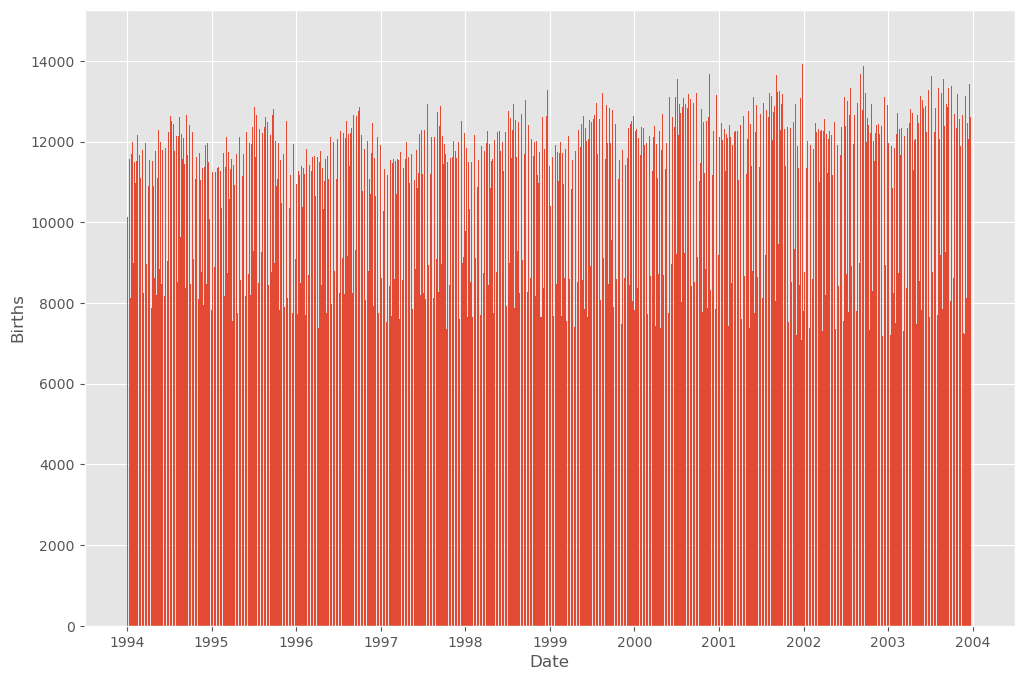

In [127]:
plt.bar(birth['date'], birth['births'])
plt.xlabel("Date")
plt.ylabel("Births")

In [128]:
# There seems to be a cyclical pattern to births per day as the year progresses. 

<AxesSubplot:xlabel='date'>

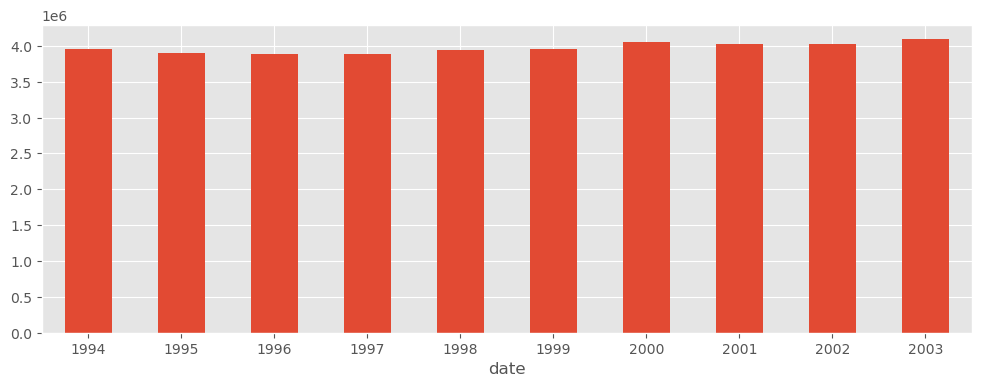

In [129]:
fig, axs = plt.subplots(figsize=(12,4))
birth.groupby(birth['date'].dt.year)['births'].sum().plot(kind = 'bar', rot=0, ax=axs)

In [131]:
mergedf = pd.merge(birth, moon, on=['date'], how='inner')
mergedf.head(100)

,date,births,phase,peak_datetime
0,1994-01-05,11053,Last Quarter,1994-01-05T00:01:00
1,1994-01-11,11706,New Moon,1994-01-11T23:10:00
2,1994-01-19,11257,First Quarter,1994-01-19T20:27:00
3,1994-01-27,11702,Full Moon,1994-01-27T13:23:00
4,1994-02-03,11523,Last Quarter,1994-02-03T08:06:00
...,...,...,...,...
95,1995-12-07,11242,Full Moon,1995-12-07T01:27:00
96,1995-12-15,11458,Last Quarter,1995-12-15T05:31:00
97,1995-12-22,11204,New Moon,1995-12-22T02:22:00
98,1995-12-28,12530,First Quarter,1995-12-28T19:06:00


Text(0, 0.5, 'Number of Births From 1994 to 2003')

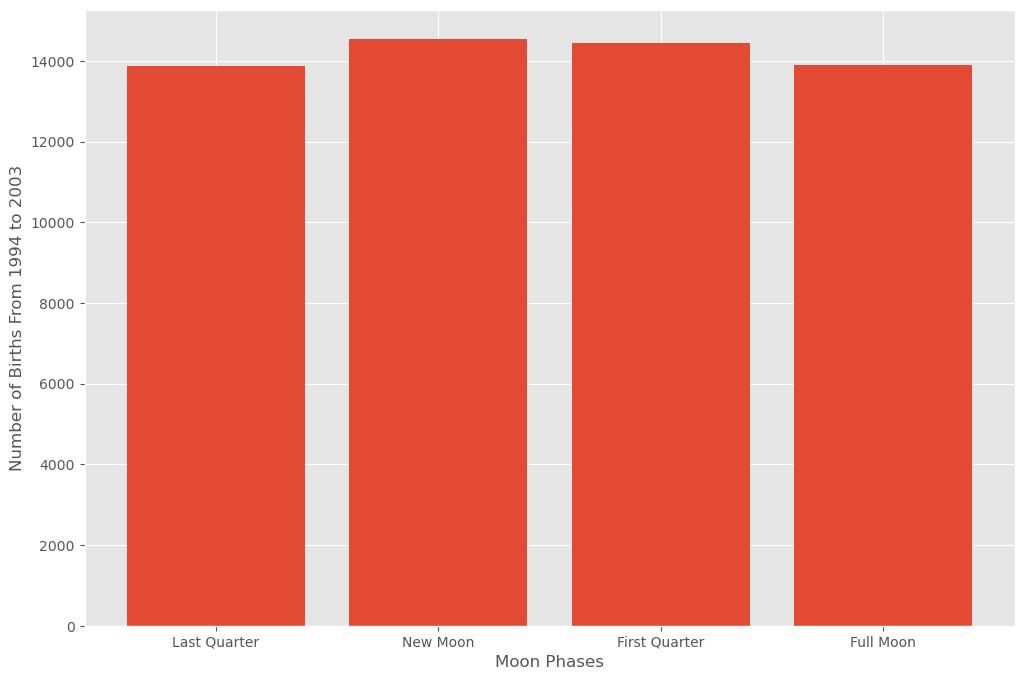

In [132]:
plt.bar(mergedf['phase'], mergedf['births'])
plt.xlabel("Moon Phases")
plt.ylabel("Number of Births From 1994 to 2003")
# Based birth data from 1994 to 2003 there appears to be no correlation between moon phases and births.

In [133]:
mergedf.to_csv('birth_moon.csv', header=True, index=False, encoding='utf-8')

In [134]:
total = mergedf['births'].sum()
mergedf['phase'].value_counts()

Last Quarter     124
New Moon         124
First Quarter    124
Full Moon        123
Name: phase, dtype: int64

In [135]:
full = mergedf.loc[mergedf['phase'] == 'Full Moon', 'births'].sum()
new = mergedf.loc[mergedf['phase'] == 'New Moon', 'births'].sum()
last = mergedf.loc[mergedf['phase'] == 'Last Quarter', 'births'].sum()
first = mergedf.loc[mergedf['phase'] == 'First Quarter', 'births'].sum()

In [136]:
fullp = mergedf.loc[mergedf['phase'] == 'Full Moon', 'births'].sum()/total*100
newp = mergedf.loc[mergedf['phase'] == 'New Moon', 'births'].sum()/total*100
lastp = mergedf.loc[mergedf['phase'] == 'Last Quarter', 'births'].sum()/total*100
firstp = mergedf.loc[mergedf['phase'] == 'First Quarter', 'births'].sum()/total*100

In [137]:
last

1359001

In [138]:
data  = pd.DataFrame({'Phases':['Last Quarter', 'New Moon', 'First Quarter', 'Full Moon'], 
        'Births':[last, new, first, full], 'Percentage of Total':[lastp, newp, firstp, fullp]})

In [139]:
data.to_csv('births_moonPhase.csv', header=True, index=False, encoding='utf-8')